In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [322]:
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [136]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [135]:
churn_data.value_counts()

CustomerId  Surname     CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  CreditScoreCat
15565701    Ferri       698          Spain      Female  39   9       161993.89  1              0          0               90212.38         0       Good              1
15732281    Ugoji       680          Germany    Male    34   6       146422.22  1              1          0               67142.97         1       Good              1
15732199    Gether      837          Spain      Male    31   9       104678.62  1              0          1               50972.60         0       Excellent         1
15732202    Abramovich  615          France     Male    34   1       83503.11   2              1          1               73124.53         1       Fair              1
15732235    Kuykendall  662          France     Male    64   0       98848.19   1              0          1               42730.12         0       Good              1
   

**9.1.** Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

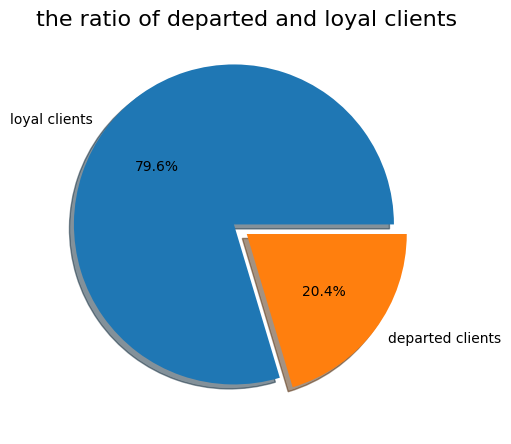

In [288]:
# data
x = churn_data.Exited.value_counts()

#plotting
labels = 'loyal clients', 'departed clients'
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    x,
    labels=labels,
    autopct='%.1f%%',
    explode = [0.1, 0],
    shadow=True
)

# adding informativeness
axes.set_title('the ratio of departed and loyal clients', fontsize=16)

#display
plt.show();

**comment on the graph**

On the diagram we see that a fifth of the customers are leaving

______________________________________

**9.2.** Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

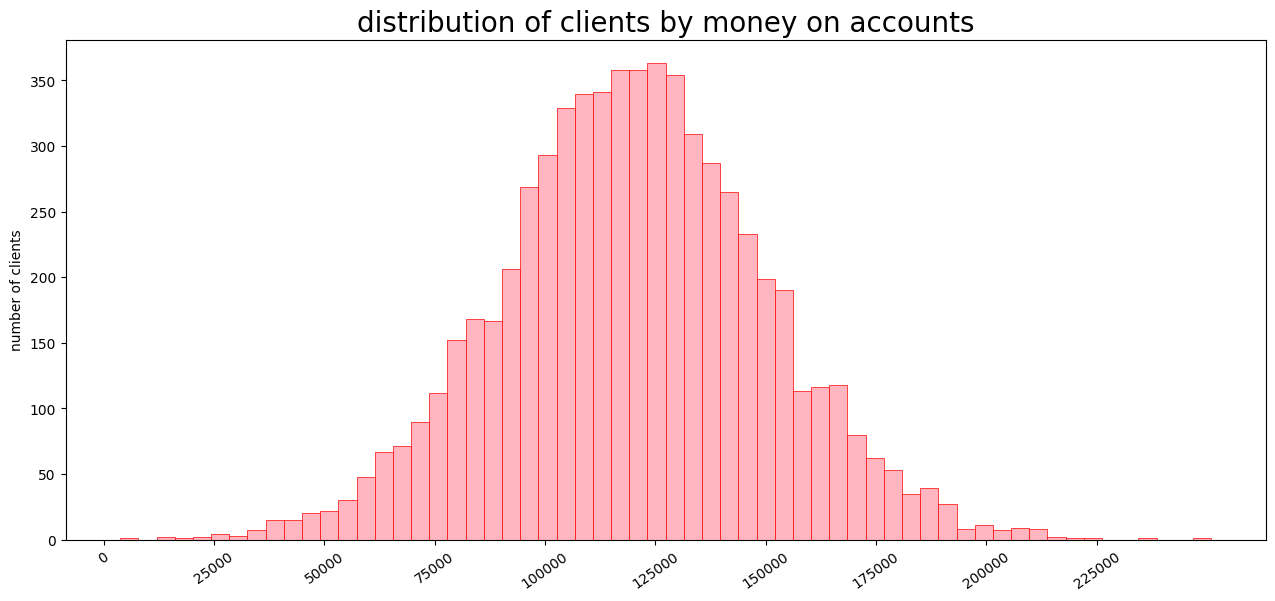

In [289]:
x =  churn_data[churn_data.Balance > 2500].Balance

fig = plt.figure(figsize=(12, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(
    x, 
    bins=60, 
    color='lightpink',
    linewidth=0.5,
    edgecolor="red",
    
)

axes.set_ylabel('number of clients')
axes.set_title('distribution of clients by money on accounts', fontsize=20)
axes.xaxis.set_tick_params(rotation=35)
plt.xticks(np.arange(0,250000,25000))
plt.show();


**comment on the graph**

On the histogram we see the normal distribution of customers depending on the amount of money in their bank accounts. The median value is around 125,000. In addition, pronounced stumps are visible on the graph, which requires additional data research.

_________________

**9.3.** Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

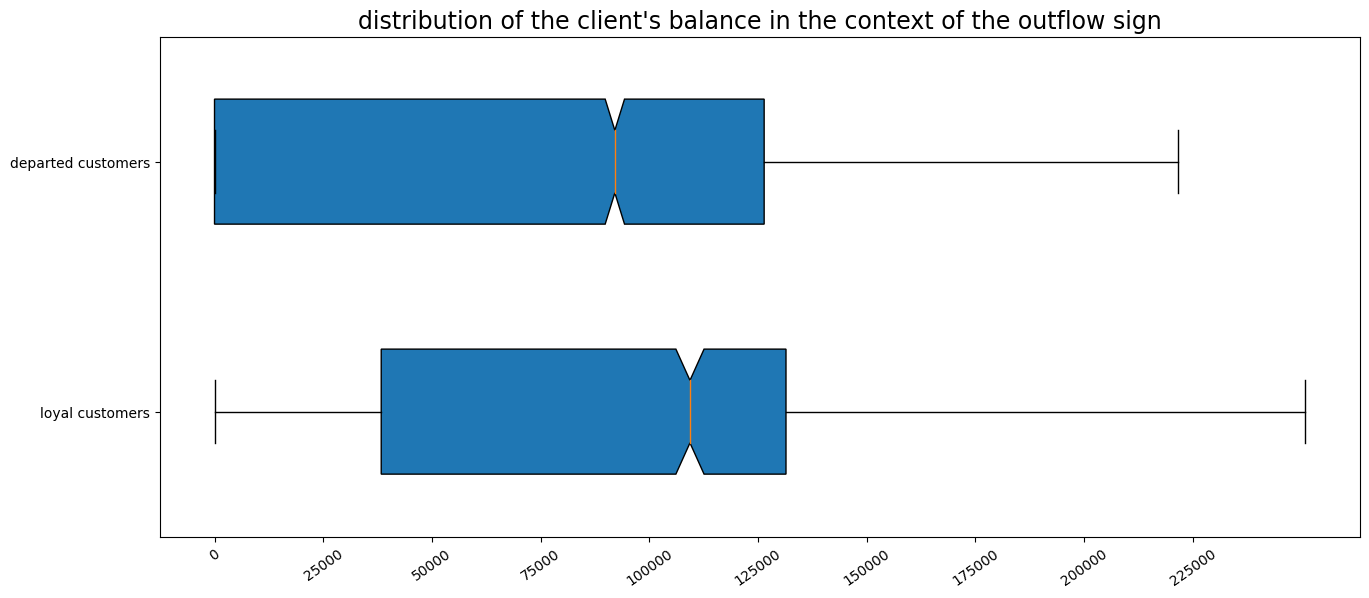

In [28]:
x =  churn_data[churn_data.Exited == 1].Balance
y =  churn_data[churn_data.Exited == 0].Balance
labels = 'loyal customers', 'departed customers'

fig = plt.figure(figsize=(12, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.boxplot(
    [x, y],
    vert=False,
    patch_artist=True,
    labels=labels,
    notch=True,
    widths=0.5,
    # color=('lightblue', 'lightgreen'),
    
)

axes.set_title("distribution of the client's balance in the context of the outflow sign", fontsize=17)
axes.xaxis.set_tick_params(rotation=35)
plt.xticks(np.arange(0,250000,25000))
plt.show();

**comment on the graph**


______________________________________

**9.4.** Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

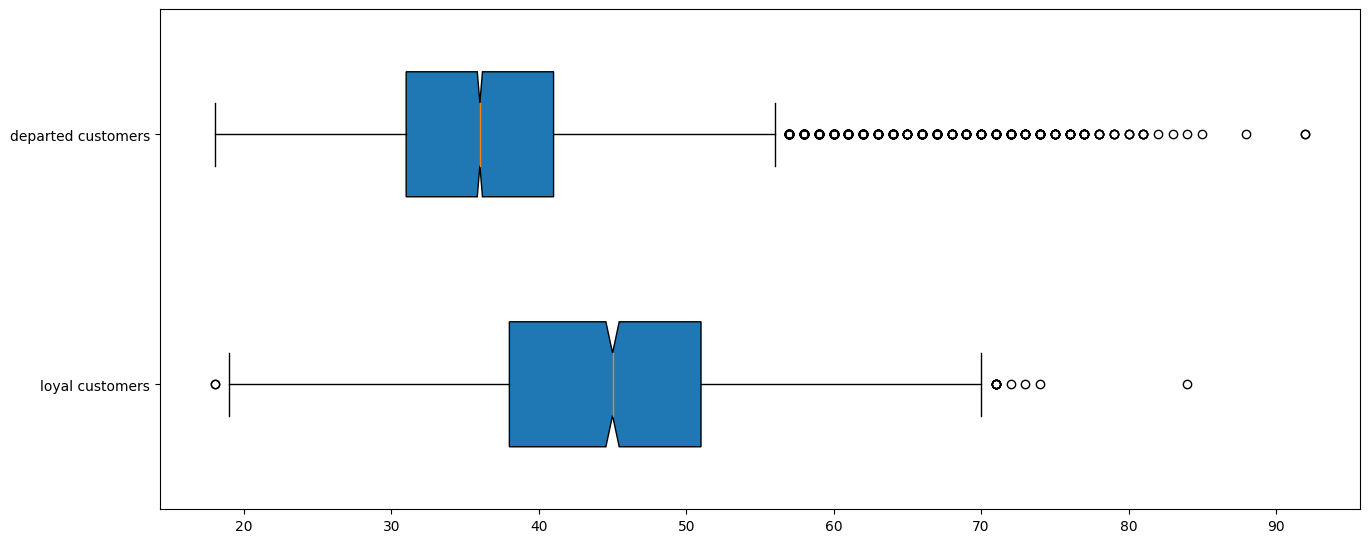

In [7]:
x =  churn_data[churn_data.Exited == 1].Age
y =  churn_data[churn_data.Exited == 0].Age
labels = 'loyal customers', 'departed customers'

fig = plt.figure(figsize=(12, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.boxplot(
    [x, y],
    vert=False,
    patch_artist=True,
    labels=labels,
    notch=True,
    widths=0.5,
    # color=('lightblue', 'lightgreen'),
    
)
plt.show();

**comment on the graph**


______________________________________

**9.5.** Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.


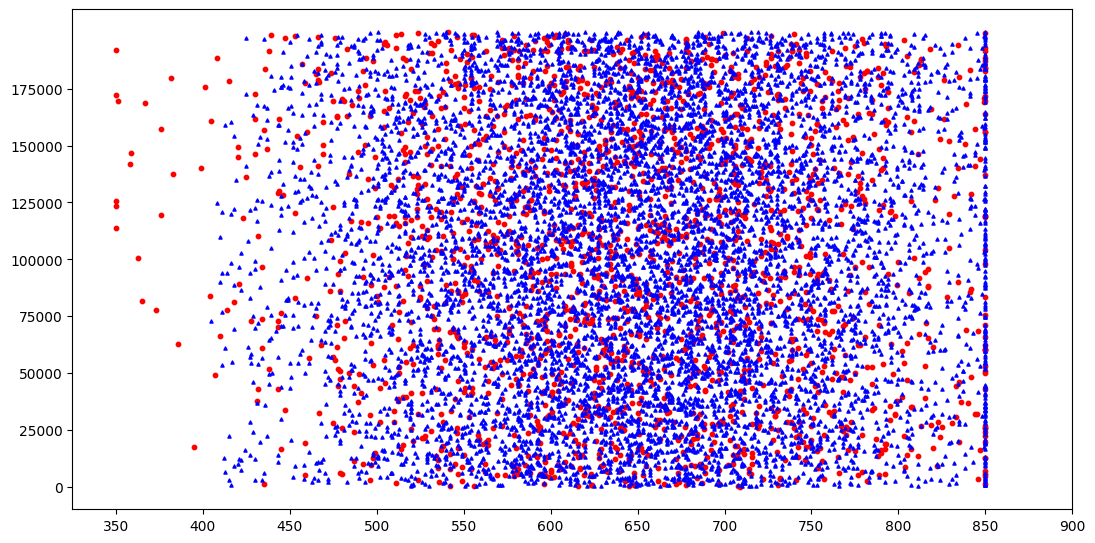

In [76]:
x1 = churn_data[churn_data.Exited == 1].CreditScore
y1 = churn_data[churn_data.Exited == 1].EstimatedSalary
x0 = churn_data[churn_data.Exited == 0].CreditScore
y0 = churn_data[churn_data.Exited == 0].EstimatedSalary

fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.scatter(
    x=x1, 
    y=y1, 
    s=10,
    marker='o',
    c='red',
)
axes.scatter(
    x=x0, 
    y=y0, 
    s=5,
    marker='^',
    c = 'blue'
)

plt.xticks(np.arange(350,950,50))
plt.yticks(np.arange(0,200000,25000))
plt.show();

**comment on the graph**
Judging by the graph, there is no dependence of the client's credit rating and his estimated salary, since the markers almost uniformly fill the entire area of acceptable values, without creating any trend. The relationship of these features also has no effect on customer loyalty


___________________


**9.6.** Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

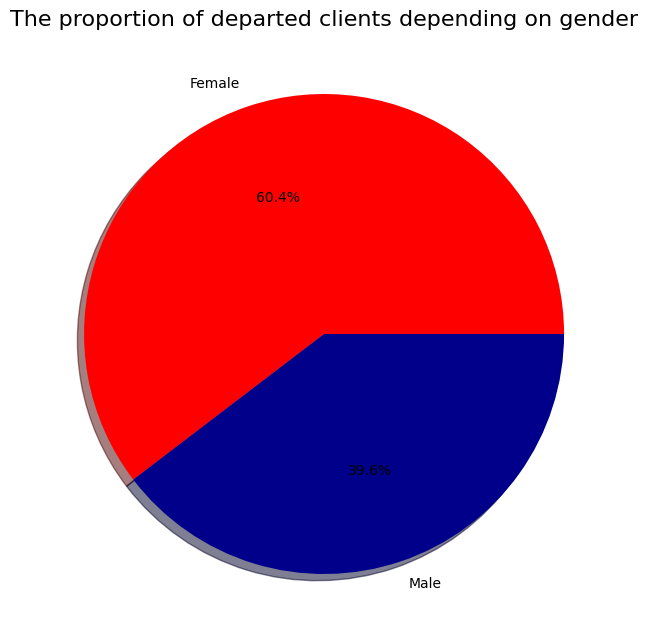

In [87]:
# data
x = churn_data.groupby('Gender').Exited.mean()

#plotting
fig = plt.figure(figsize=(6, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    x,
    labels=x.index,
    autopct='%.1f%%',
    shadow=True,
    colors=['red', 'darkblue']
)

# adding informativeness
axes.set_title('The proportion of departed clients depending on gender', fontsize=16)

#display
plt.show();

**comment on the graph**

women are one and a half times more likely to stop being bank customers




**9.7.** Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.



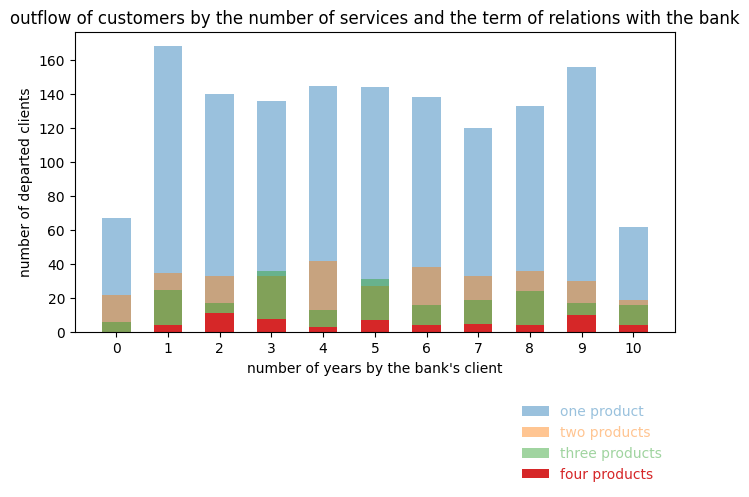

In [318]:
# data
departed_data = churn_data[churn_data['Exited'] == 1].reset_index()
y = departed_data.groupby(['NumOfProducts', 'Tenure'])['Exited'].count()

# plotting
fig = plt.figure(figsize=(6, 3))
axes = fig.add_axes([0, 0, 1, 1])
for i in range(1, 4):
   axes.bar(range(0, 11),
            y[i],
            width = 0.55,
            alpha=0.45
)
axes.bar(range(1, 11), y[4], width = 0.55)

# adding informativeness
plt.title('outflow of customers by the number of services and the term of relations with the bank')
plt.ylabel('number of departed clients')
plt.xlabel( "number of years by the bank's client")
plt.xticks(np.arange(0, 11, 1))
plt.legend(['one product', 'two products', 'three products', 'four products'],
           loc='upper right',
           bbox_to_anchor=(1, -0.2),
           labelcolor='mfc',
           frameon=False,
)

# display
plt.show();

In [272]:
departed_data[departed_data['Tenure'] == 0]['NumOfProducts'].value_counts()

1    67
2    22
3     6
Name: NumOfProducts, dtype: int64

**comment on the graph**

basically, those who refrained from buying a second product, regardless of the period of ownership, leave the bank. In addition, additional research requires the absence of data on those who purchased four products, but left the bank in the first year




___________________________________________

**9.8.** Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?



**comment on the graph**






**9.9.** В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.


**comment on the graph**






_______________________________

**9.10.** Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [324]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

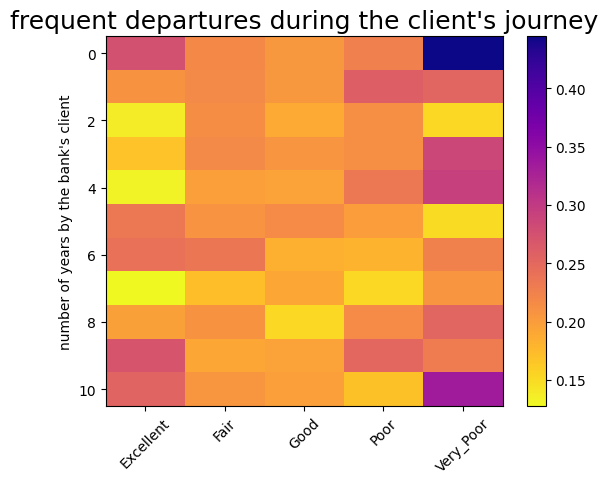

In [331]:
# data
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data.pivot_table(
    values='Exited',
    index='Tenure',
    columns='CreditScoreCat',
    aggfunc='mean',
).sort_values('Tenure', ascending=True)

# plotting
plt.imshow(
    pivot,
    aspect='auto',
    cmap='plasma_r',
    interpolation="nearest"
)

# adding informativeness
plt.title("frequent departures during the client's journey", fontsize=18)
plt.xticks(ticks=np.arange(5), labels=pivot.columns, rotation=45)
plt.ylabel("number of years by the bank's client")
plt.colorbar()

# display
plt.show();

**comment on the graph**
most often, customers of the "very poor" category terminate their relationship with the bank, especially in the first year of interaction
at the same time, regardless of the category, it is least risky to lose customers in the second, fifth and seventh years of working with them



